In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pathlib import Path

import sys
sys.path.append("..")
import mask_lib as mlib

import pandas as pd
import numpy as np
from scipy.spatial import distance

import cv2
from skimage import io

root_dir = Path("/home/hadim/.data/Neural_Network/Mask-RCNN/Microtubules/")

data_dir = root_dir / "Data"
data_dir.mkdir(parents=True, exist_ok=True)

model_dir = root_dir / "logs"
model_dir.mkdir(parents=True, exist_ok=True)

model_name = "microtubule_coco_512"

/home/hadim/local/conda/envs/nn/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load Image

In [4]:
image_dir = Path("/home/hadim/Documents/Code/Postdoc/ij/testdata/")
output_dir = image_dir / "mrcnn"
output_dir.mkdir(parents=True, exist_ok=True)

image_path = image_dir / "fake-flat-corrected.tif"
#image_path = image_dir / "7,5uM_emccd_lapse1-small-8bit-Single.tif"
#image_path = image_dir / "test-tracking-single.tif"
#image_path = image_dir / "seed_single.tif"
#image_path = image_dir / "mt_single2.tif"
#image_path = image_dir / "seed-small.tif"
#image_path = image_dir / "mt-small.tif"
#image_path = image_dir / "Movie_2_MMStack_Pos0.ome-MT.tif"
#image_path = image_dir / "Movie_2_MMStack_Pos0.ome-SEEDS.tif"
#image_path = image_dir / "Movie_2_MMStack_Pos0.ome-SMALL-MT.tif"
#image_path = image_dir / "Movie_2_MMStack_Pos0.ome-SMALL-SEEDS.tif"

result_image_path = output_dir / image_path.name

# Load and preprocess image
original_image = io.imread(image_path)
original_image = np.expand_dims(original_image, axis=0)
image = mlib.preprocess_image(original_image)

#image = image[30:31]

mlib.show_images(image, size=10)

interactive(children=(IntSlider(value=0, description='t', max=0), Output()), _dom_classes=('widget-interact',)…

# Load the Model

In [8]:
config = mlib.MicrotubuleInferenceConfig()
config.set_images_per_gpu(1)

model = mlib.load_model(model_dir, config, mode="inference")
mlib.load_weights(model, init_with="last", model_name=model_name)

In [9]:
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CLASS_NAMES                    ['BG', 'microtubule']
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  100
IMAGE_MIN_SCALE                1.0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               200
MEAN_PIXEL                     [43.53 39.56 48.22]
MINI_MASK_SHAPE                (56, 56)
NAME                           microtubule
NUM_CLASSES      

# Prediction

In [17]:
results = mlib.predict(image, model, progress=True, verbose=0)

masked_image = mlib.draw_results(image, results, model.config.CLASS_NAMES, colors=None, resize_ratio=3,
                                 draw_boxes=True, draw_masks=True, draw_contours=False, draw_score=True)
#io.imsave(str(result_image_path.with_suffix(".NO-FILTERED.tif")), masked_image)
mlib.show_images([image, masked_image], size=10)

100%|██████████| 1/1 [00:00<00:00, 82.32it/s]


interactive(children=(IntSlider(value=0, description='t', max=0), Output()), _dom_classes=('widget-interact',)…

# Filter Results

In [11]:
filtered_results = mlib.filter_results(results, min_diameter=30)

masked_image = mlib.draw_results(image, filtered_results, model.config.CLASS_NAMES, colors=None, resize_ratio=3,
                                 draw_boxes=False, draw_masks=True, draw_contours=True, draw_score=True)
io.imsave(str(result_image_path), masked_image)
mlib.show_images([image, masked_image], size=10)

100%|██████████| 1/1 [00:00<00:00, 62.98it/s]


interactive(children=(IntSlider(value=0, description='t', max=0), Output()), _dom_classes=('widget-interact',)…

# Convert Masks to Lines

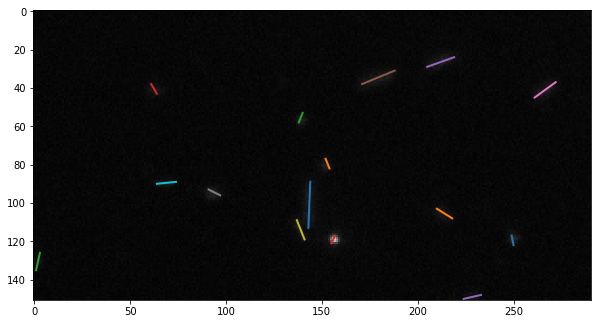

In [9]:
data = mlib.find_filaments(results)
mlib.show_images(image[:, :, :, 1], lines=data, size=10, cmap="gray")

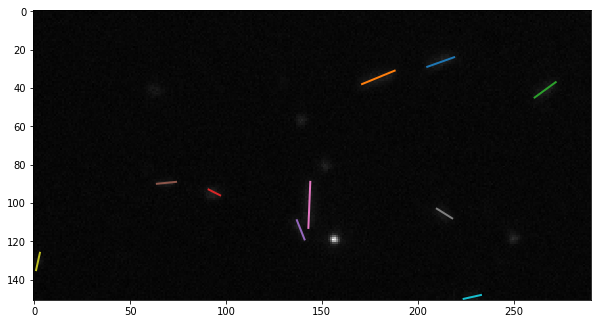

In [8]:
data = mlib.find_filaments(filtered_results)
mlib.show_images(image[:, :, :, 1], lines=data, size=10, cmap="gray")